In [ ]:
%pip install ccxt
%pip install pandas

In [41]:
import ccxt
import math
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime, timedelta
import datetime
import calendar
import numpy as np
import matplotlib.dates as mdates

In [42]:
def fetch_historical_data(exchange, symbol, timeframe, since):
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since)
    df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df['date'] = df['timestamp'].dt.strftime('%m-%d-%y')
    df = df.tail(90) # used to select only the last 90 days of entries into the DF
    return df

In [46]:
HOURS_IN_DAY = 24
MS_IN_SEC = 1000
NUM_WEEKDAYS = 5
NUM_WEEKEND_DAYS = 2

#   API key stuff
api_key = 'Z6bH9gXJ7UllNhBuj0'
api_secret = 'gtajv8bMci1T3BIEmTMzgS4PQU5IECuFWqKz'
exchange = ccxt.bybit({'apiKey': api_key, 'secret': api_secret})

#   Asset and timeframe
symbol = 'BTCUSDT'
timeframe = '5m'
DAYS = 90
PERIODS_IN_HOUR = 12
n = math.ceil(PERIODS_IN_HOUR * HOURS_IN_DAY * DAYS / MS_IN_SEC)

In [47]:
# Get today's date and subtract 90 days
today = datetime.datetime.utcnow()
day_90 = today - datetime.timedelta(DAYS)
day_90_midnight = datetime.datetime(day_90.year, day_90.month, day_90.day, 0, 0, 0)
since = int(calendar.timegm(day_90_midnight.utctimetuple()) * MS_IN_SEC) 

# Fetch historical dataa
def create_df(since):
    limit = PERIODS_IN_HOUR * HOURS_IN_DAY * DAYS
    historical_data = exchange.fetch_ohlcv(symbol, timeframe, since = since, limit = limit)

    # Convert data to DataFrame
    df = pd.DataFrame(historical_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit = 'ms')
    return df


In [48]:
since_timestamp_list = [since]
df_big = pd.DataFrame()

for i in range(n):
    df = create_df(since)
    df_big = pd.concat([df_big, df], ignore_index = True)
    since = int((df['timestamp'].max().timestamp() * MS_IN_SEC))
    since_timestamp_list.append(since)

# Initial weekend and weekday data set
weekdays_data = df_big[df_big['timestamp'].dt.weekday < NUM_WEEKDAYS]  # Monday to Friday
weekends_data = df_big[df_big['timestamp'].dt.weekday >= NUM_WEEKDAYS]  # Saturday and Sunday

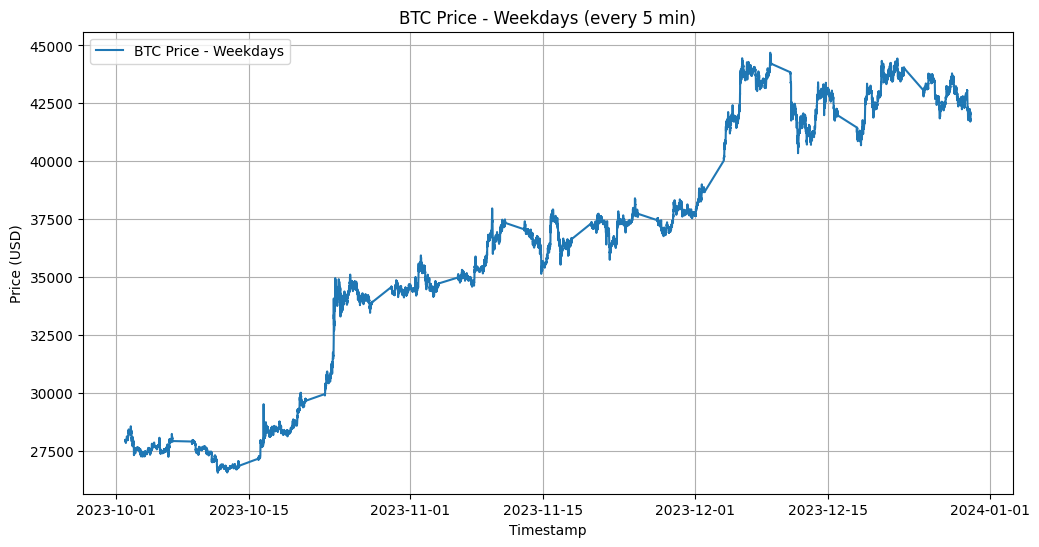

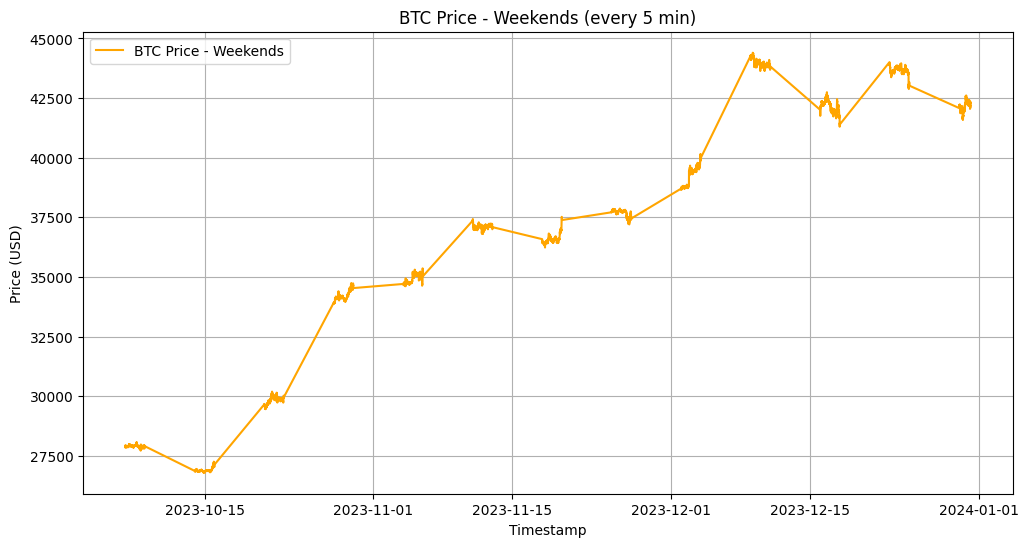

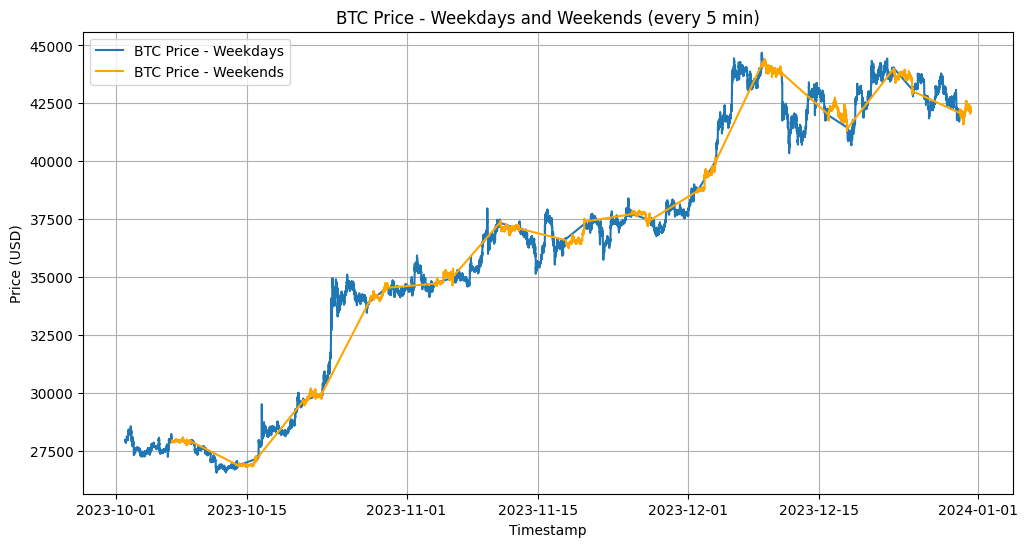

In [50]:
# Plot for weekdays
plt.figure(figsize=(12, 6))
plt.plot(weekdays_data['timestamp'], weekdays_data['close'], label='BTC Price - Weekdays')
plt.title('BTC Price - Weekdays (every 5 min)')
plt.xlabel('Timestamp')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Plot for weekends
plt.figure(figsize=(12, 6))
plt.plot(weekends_data['timestamp'], weekends_data['close'], label='BTC Price - Weekends', color='orange')
plt.title('BTC Price - Weekends (every 5 min)')
plt.xlabel('Timestamp')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


# Overlay both
plt.figure(figsize=(12, 6))
# Plot weekdays_data
plt.plot(weekdays_data['timestamp'], weekdays_data['close'], label='BTC Price - Weekdays')
# Plot weekends_data
plt.plot(weekends_data['timestamp'], weekends_data['close'], label='BTC Price - Weekends', color='orange')
plt.title('BTC Price - Weekdays and Weekends (every 5 min)')
plt.xlabel('Timestamp')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

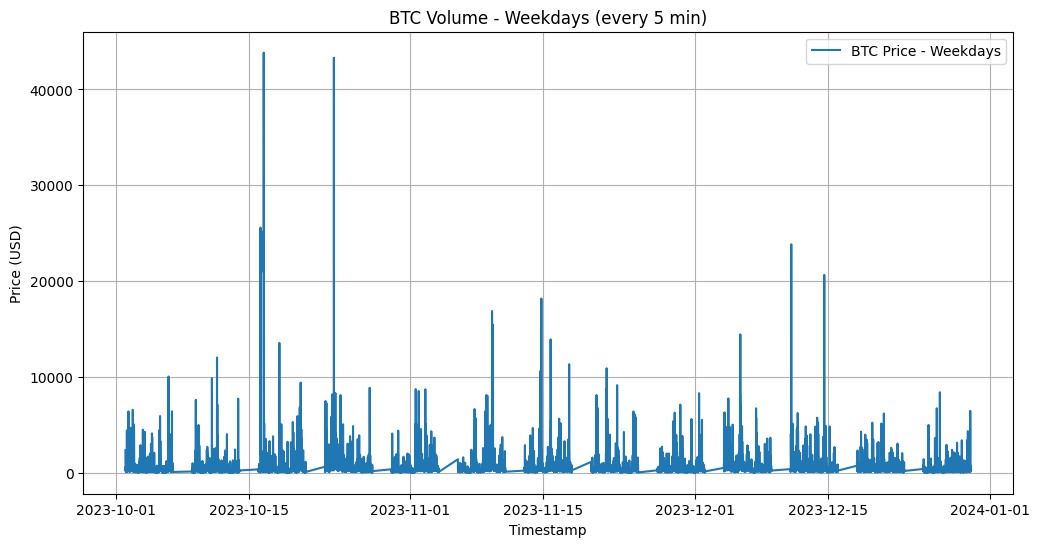

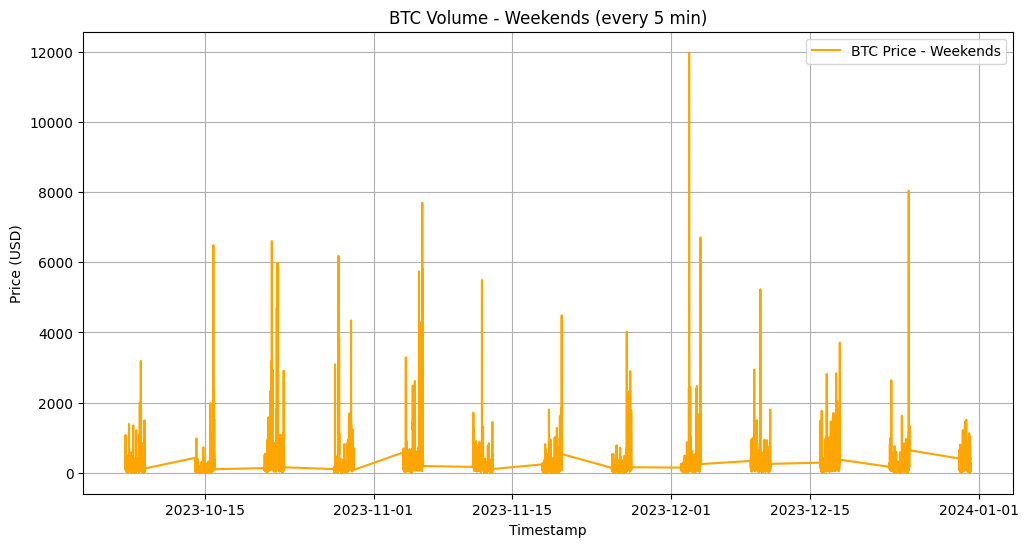

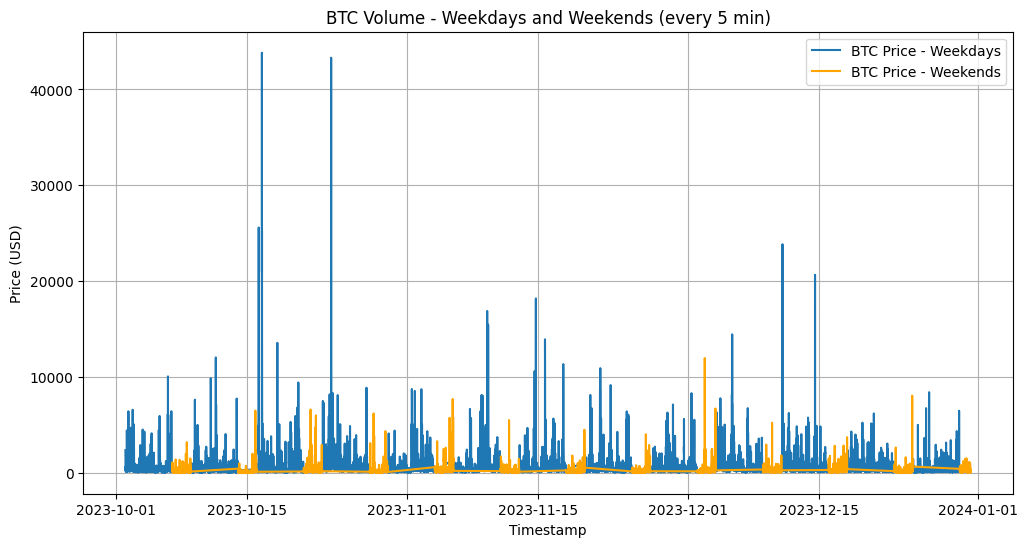

In [51]:
# Plot for weekdays volume
plt.figure(figsize=(12, 6))
plt.plot(weekdays_data['timestamp'], weekdays_data['volume'], label='BTC Price - Weekdays')
plt.title('BTC Volume - Weekdays (every 5 min)')
plt.xlabel('Timestamp')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Plot for weekends volume
plt.figure(figsize=(12, 6))
plt.plot(weekends_data['timestamp'], weekends_data['volume'], label='BTC Price - Weekends', color='orange')
plt.title('BTC Volume - Weekends (every 5 min)')
plt.xlabel('Timestamp')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Overlay both volumes
plt.figure(figsize=(12, 6))
# Plot weekdays_data
plt.plot(weekdays_data['timestamp'], weekdays_data['volume'], label='BTC Price - Weekdays')
# Plot weekends_data
plt.plot(weekends_data['timestamp'], weekends_data['volume'], label='BTC Price - Weekends', color='orange')
plt.title('BTC Volume - Weekdays and Weekends (every 5 min)')
plt.xlabel('Timestamp')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

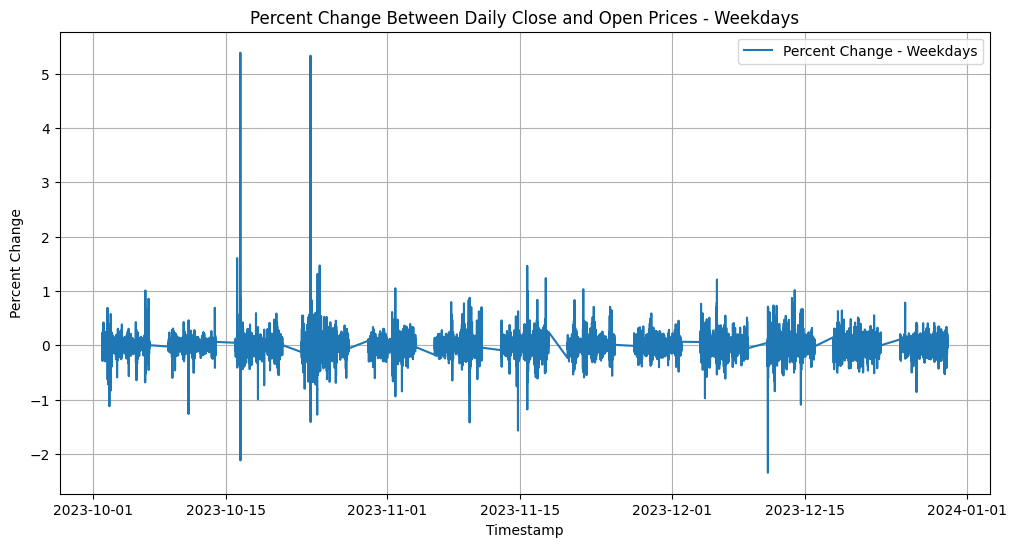

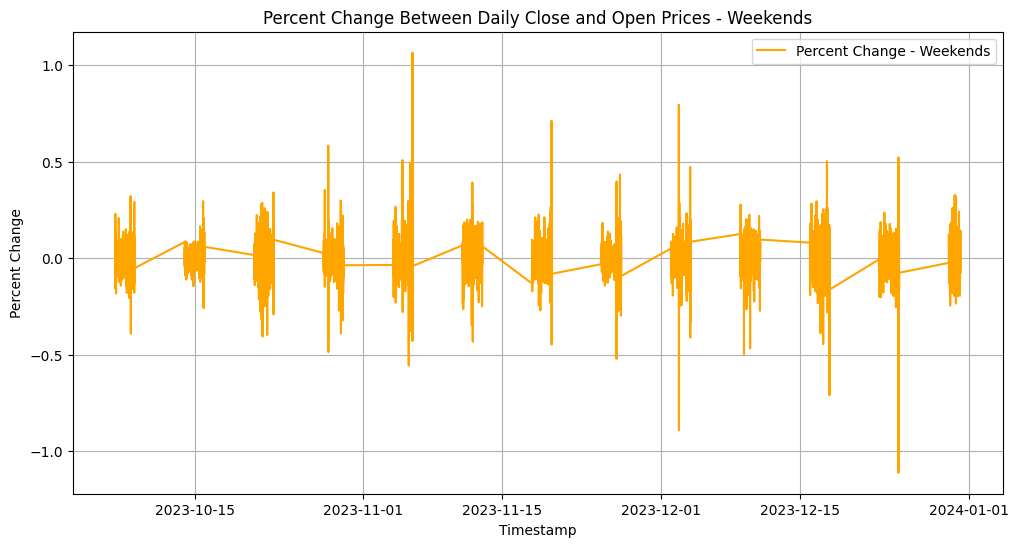

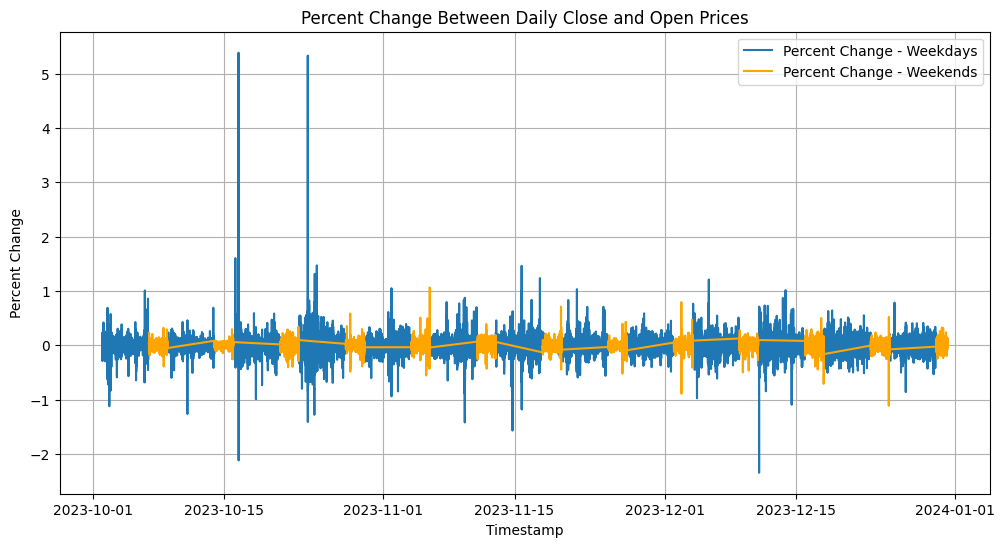

In [57]:
# Calculate percent change for weekdays
weekdays_data = weekdays_data.copy()
weekdays_data['percent_change'] = (weekdays_data['close'] - weekdays_data['open']) / weekdays_data['open'] * 100

# Plot percent change for weekdays
plt.figure(figsize=(12, 6))
plt.plot(weekdays_data['timestamp'], weekdays_data['percent_change'], label='Percent Change - Weekdays')
plt.title('Percent Change Between Daily Close and Open Prices - Weekdays')
plt.xlabel('Timestamp')
plt.ylabel('Percent Change')
plt.legend()
plt.grid(True)
plt.show()

# Calculate percent change for weekends
weekends_data = weekends_data.copy()
weekends_data['percent_change'] = (weekends_data['close'] - weekends_data['open']) / weekends_data['open'] * 100
plt.figure(figsize=(12, 6))
plt.plot(weekends_data['timestamp'], weekends_data['percent_change'], label='Percent Change - Weekends', color='orange')
plt.title('Percent Change Between Daily Close and Open Prices - Weekends')
plt.xlabel('Timestamp')
plt.ylabel('Percent Change')
plt.legend()
plt.grid(True)
plt.show()

# Plot with overlay
plt.figure(figsize=(12, 6))
plt.plot(weekdays_data['timestamp'], weekdays_data['percent_change'], label='Percent Change - Weekdays')
plt.plot(weekends_data['timestamp'], weekends_data['percent_change'], label='Percent Change - Weekends', color='orange')
plt.title('Percent Change Between Daily Close and Open Prices')
plt.xlabel('Timestamp')
plt.ylabel('Percent Change')
plt.legend()
plt.grid(True)
plt.show()


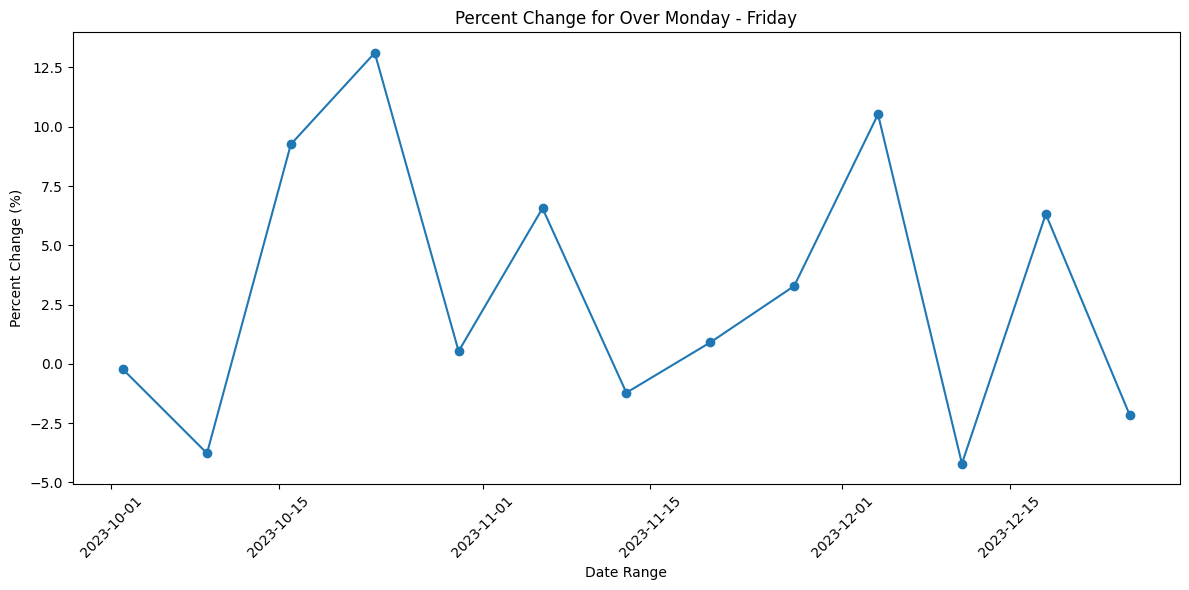

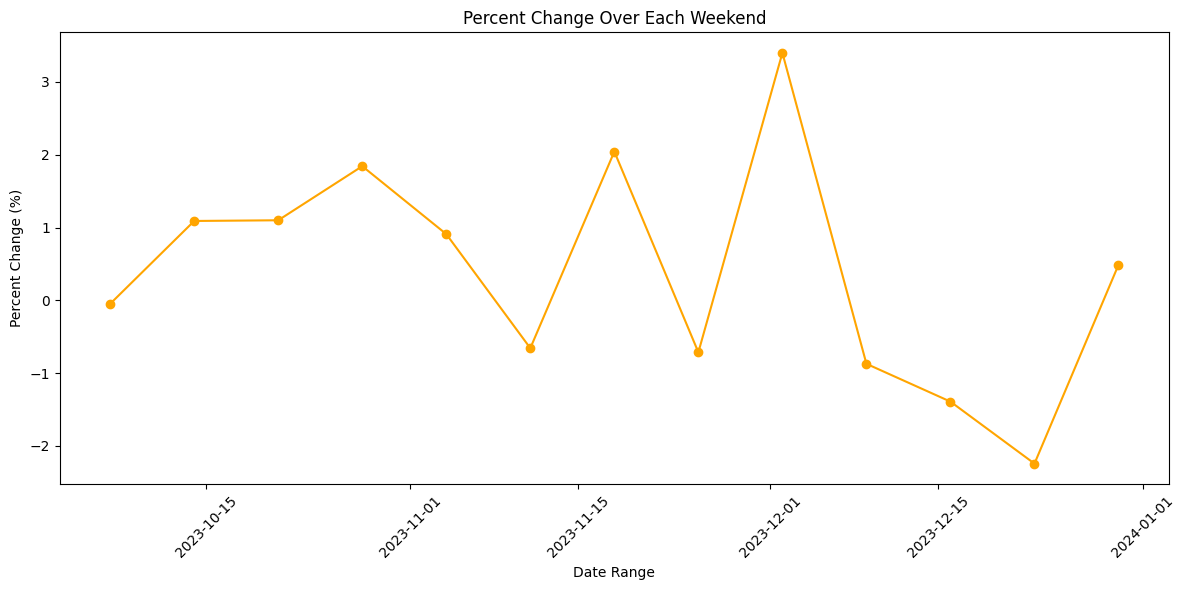

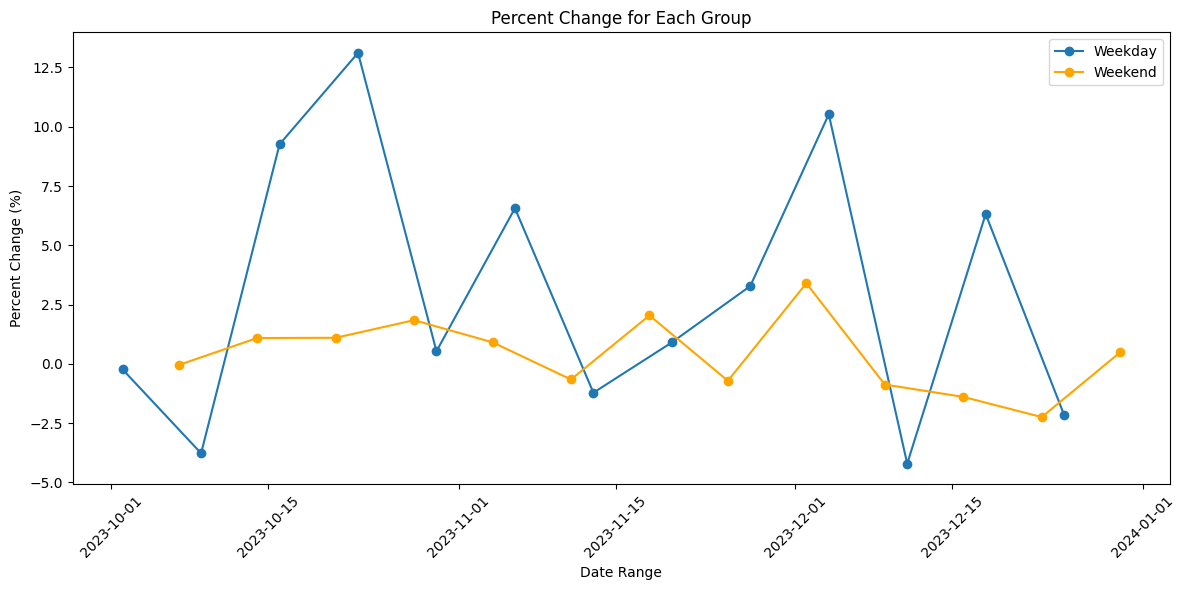

In [58]:
# WEEKDAY RETURNS
groups_weekday = weekdays_data.groupby(np.arange(len(weekdays_data.index)) // ((PERIODS_IN_HOUR * HOURS_IN_DAY * NUM_WEEKDAYS) + 1)) # "+ 1" accounts for last 5 minutes of each friday
print(groups_weekday)

percent_changes_weekday = []
for group_name, group_data in groups_weekday:
    open_price = group_data.loc[group_data.index[0], 'open']
    close_price = group_data.loc[group_data.index[-1], 'close']
    percent_change = ((close_price - open_price) / open_price) * 100
    percent_changes_weekday.append(percent_change)

start_timestamps_weekday = [group_data['timestamp'].iloc[0] for _, group_data in groups_weekday]

plt.figure(figsize=(12, 6))
plt.plot(start_timestamps_weekday, percent_changes_weekday, marker='o', linestyle='-')
plt.title('Percent Change for Over Monday - Friday')
plt.xlabel('Date Range')
plt.ylabel('Percent Change (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# WEEKEND RETURNS
groups_weekend = weekends_data.groupby(np.arange(len(weekends_data.index)) // ((PERIODS_IN_HOUR * HOURS_IN_DAY * NUM_WEEKEND_DAYS) + 1)) # "+ 1" accounts for last 5 minutes of each sunday
print(groups_weekend)

percent_changes_weekend = []
for group_name, group_data in groups_weekend:
    open_price = group_data.loc[group_data.index[0], 'open']
    close_price = group_data.loc[group_data.index[-1], 'close']
    percent_change = ((close_price - open_price) / open_price) * 100
    percent_changes_weekend.append(percent_change)

start_timestamps_weekend = [group_data['timestamp'].iloc[0] for _, group_data in groups_weekend]

plt.figure(figsize=(12, 6))
plt.plot(start_timestamps_weekend, percent_changes_weekend, marker='o', linestyle='-', color = 'orange')
plt.title('Percent Change Over Each Weekend')
plt.xlabel('Date Range')
plt.ylabel('Percent Change (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Plotting with overlay
plt.figure(figsize=(12, 6))

plt.plot(start_timestamps_weekday, percent_changes_weekday, marker='o', linestyle='-', label='Weekday')
plt.plot(start_timestamps_weekend, percent_changes_weekend, marker='o', linestyle='-', label='Weekend', color='orange')

plt.title('Percent Change for Each Group')
plt.xlabel('Date Range')
plt.ylabel('Percent Change (%)')
plt.xticks(rotation=45)
plt.legend()  # Show legend to distinguish between weekday and weekend
plt.tight_layout()
plt.show()

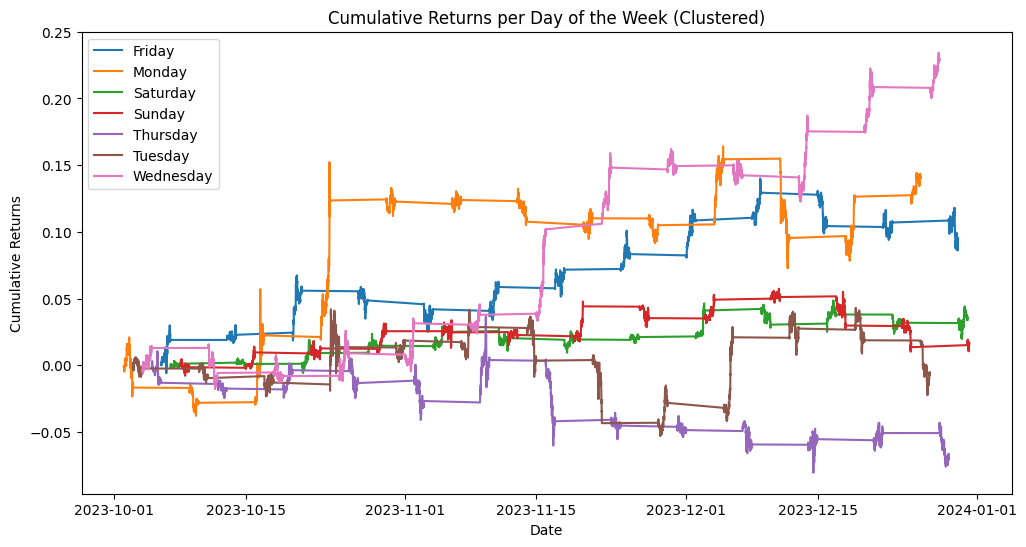

In [59]:
#CUMULATIVE RETURNS PER DAY OF THE WEEK
df_big['returns'] = df_big['close'].pct_change()

# Group data by day of the week
day_of_week_grouped = df_big.groupby(df_big['timestamp'].dt.dayofweek)
cumulative_returns_per_day = day_of_week_grouped['returns'].cumsum()

plt.figure(figsize=(12, 6))

for day, data in cumulative_returns_per_day.groupby(df_big['timestamp'].dt.day_name()):
    plt.plot(df_big.iloc[data.index]['timestamp'] , data.values, label=day)

plt.title('Cumulative Returns per Day of the Week (Clustered)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

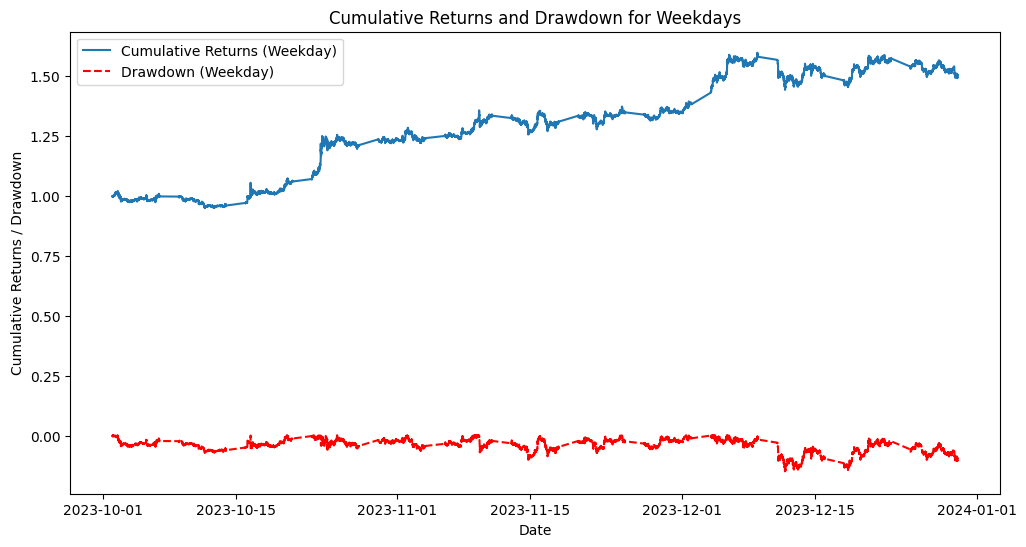

Maximum Drawdown Weekday: -15.52%
Annualized Return Weekday: 0.55%
Calmar Ratio Weekday: 0.04


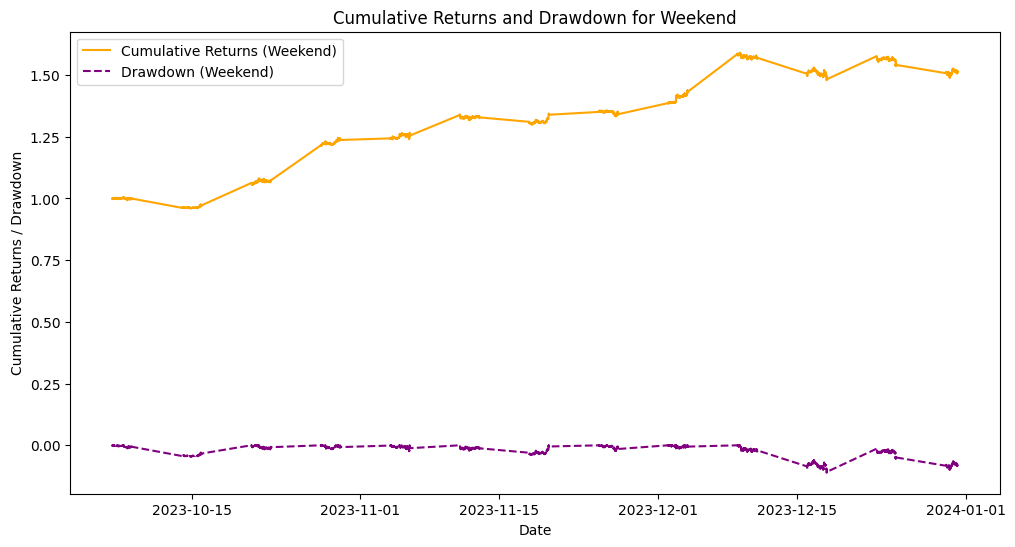

Maximum Drawdown Weekend: -11.11%
Annualized Return Weekend: 1.45%
Calmar Ratio Weekend: 0.13


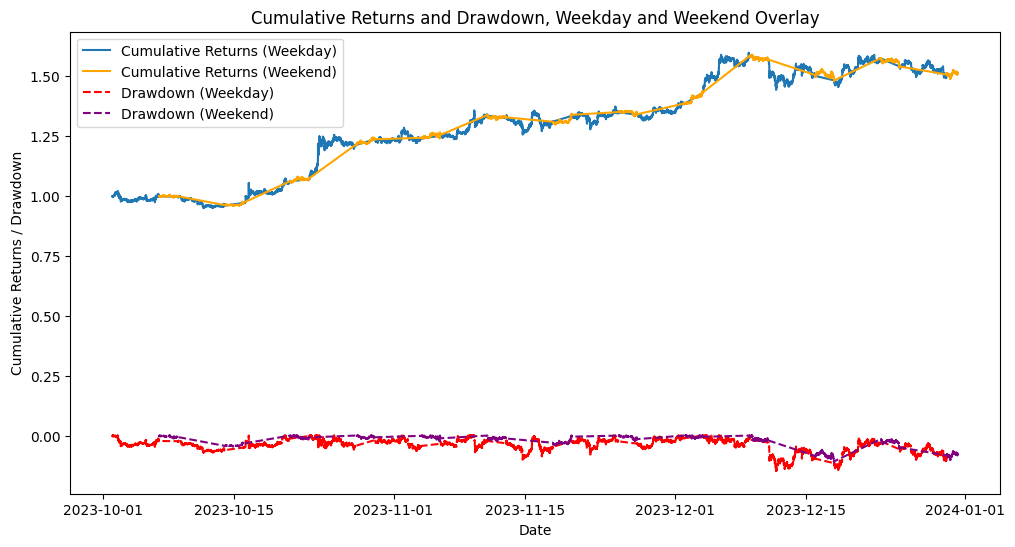

In [60]:
# Create a copy of weekdays_data to avoid SettingWithCopyWarning
weekdays_data = weekdays_data.copy()
weekdays_data['returns'] = weekdays_data['close'].pct_change()
weekdays_data['cumulative_returns'] = (1 + weekdays_data['returns']).cumprod()
weekdays_data['cumulative_max'] = weekdays_data['cumulative_returns'].cummax()
weekdays_data['drawdown'] = weekdays_data['cumulative_returns'] - weekdays_data['cumulative_max']
max_drawdown_weekday = weekdays_data['drawdown'].min()

# Calculate annualized return for weekdays
annualized_return_weekday = (weekdays_data['cumulative_returns'].iloc[-1] ** (252 / len(weekdays_data))) - 1  # Assuming 252 trading days in a year

# Calculate Calmar ratio for weekdays
calmar_ratio_weekday = annualized_return_weekday / abs(max_drawdown_weekday)

plt.figure(figsize=(12, 6))
plt.plot(weekdays_data['timestamp'], weekdays_data['cumulative_returns'], label='Cumulative Returns (Weekday)')
plt.plot(weekdays_data['timestamp'], weekdays_data['drawdown'], label='Drawdown (Weekday)', color='red', linestyle='--')
plt.title('Cumulative Returns and Drawdown for Weekdays')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns / Drawdown')
plt.legend()
plt.show()

print(f"Maximum Drawdown Weekday: {max_drawdown_weekday:.2%}")
print(f"Annualized Return Weekday: {annualized_return_weekday:.2%}")
print(f"Calmar Ratio Weekday: {calmar_ratio_weekday:.2f}")

# Create a copy of weekends_data to avoid SettingWithCopyWarning
weekends_data = weekends_data.copy()

weekends_data['returns'] = weekends_data['close'].pct_change()
weekends_data['cumulative_returns'] = (1 + weekends_data['returns']).cumprod()
weekends_data['cumulative_max'] = weekends_data['cumulative_returns'].cummax()
weekends_data['drawdown'] = weekends_data['cumulative_returns'] - weekends_data['cumulative_max']
max_drawdown_weekend = weekends_data['drawdown'].min()

# Calculate annualized return for weekends
annualized_return_weekend = (weekends_data['cumulative_returns'].iloc[-1] ** (252 / len(weekends_data))) - 1  # Assuming 252 trading days in a year

# Calculate Calmar ratio for weekends
calmar_ratio_weekend = annualized_return_weekend / abs(max_drawdown_weekend)

plt.figure(figsize=(12, 6))
plt.plot(weekends_data['timestamp'], weekends_data['cumulative_returns'], label='Cumulative Returns (Weekend)', color='orange')
plt.plot(weekends_data['timestamp'], weekends_data['drawdown'], label='Drawdown (Weekend)', color='purple', linestyle='--')
plt.title('Cumulative Returns and Drawdown for Weekend')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns / Drawdown')
plt.legend()
plt.show()

print(f"Maximum Drawdown Weekend: {max_drawdown_weekend:.2%}")
print(f"Annualized Return Weekend: {annualized_return_weekend:.2%}")
print(f"Calmar Ratio Weekend: {calmar_ratio_weekend:.2f}")

# Plot with overlay
plt.figure(figsize=(12, 6))
plt.plot(weekdays_data['timestamp'], weekdays_data['cumulative_returns'], label='Cumulative Returns (Weekday)')
plt.plot(weekends_data['timestamp'], weekends_data['cumulative_returns'], label='Cumulative Returns (Weekend)', color='orange')
plt.plot(weekdays_data['timestamp'], weekdays_data['drawdown'], label='Drawdown (Weekday)', color='red', linestyle='--')
plt.plot(weekends_data['timestamp'], weekends_data['drawdown'], label='Drawdown (Weekend)', color='purple', linestyle='--')
plt.title('Cumulative Returns and Drawdown, Weekday and Weekend Overlay')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns / Drawdown')
plt.legend()
plt.show()